In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
df = pd.read_csv("D:/full_deep_learning_notes/Churn_Modelling.csv")


In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [5]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [7]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [8]:
# One Hot Encoding
# drop_first=True to avoid dummy variable trap
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True) #

In [9]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [10]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [11]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
X_train_scaled

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [13]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [14]:
model = Sequential()

model.add(Dense(11,activation='sigmoid',input_dim=11))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

c:\Users\Lenovo\anaconda3\envs\amar\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
history = model.fit(X_train_scaled,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7946 - loss: 0.5854 - val_accuracy: 0.7969 - val_loss: 0.5024
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7977 - loss: 0.4965 - val_accuracy: 0.7969 - val_loss: 0.4881
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7920 - loss: 0.4913 - val_accuracy: 0.7969 - val_loss: 0.4741
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7921 - loss: 0.4747 - val_accuracy: 0.7969 - val_loss: 0.4595
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8033 - loss: 0.4439 - val_accuracy: 0.7969 - val_loss: 0.4474
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7882 - loss: 0.4486 - val_accuracy: 0.7962 - val_loss: 0.4393
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8044 - loss: 0.4315 - val_accuracy: 0.8131 - val_loss: 0.4350
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8151 - loss: 0.4243 - val_accu

In [18]:
# seen weight and bias values of first layer
# 2nd [1],and 3rd [2] layers can be seen similarly
model.layers[0].get_weights()

[array([[-2.19484434e-01, -1.67765394e-01,  7.18697235e-02,
         -1.28758892e-01,  1.95093125e-01, -3.55521329e-02,
         -6.35281298e-03, -2.44297475e-01,  1.02108255e-01,
          4.59228233e-02, -4.94023785e-02],
        [ 1.39099956e+00, -1.26680374e+00, -1.87919271e+00,
          3.25371742e-01, -1.48380172e+00, -1.37406313e+00,
          2.77079463e-01,  1.58474958e+00, -1.29185724e+00,
          6.74351275e-01, -1.14648819e+00],
        [ 3.28022361e-01,  9.58307758e-02,  6.74731314e-01,
          4.28263377e-03,  2.07129538e-01,  2.36452520e-01,
         -1.60501435e-01,  2.10652798e-02, -1.40130892e-01,
          3.10818646e-02,  8.21317881e-02],
        [-4.43809718e-01, -4.52848941e-01,  3.97683084e-01,
         -8.95005047e-01,  4.47628796e-01, -8.66412669e-02,
         -3.00514638e-01,  3.10713470e-01, -7.83326030e-02,
          1.55525160e+00, -1.18147039e+00],
        [ 7.36694574e-01, -8.16152453e-01, -9.29672837e-01,
         -9.02287185e-01, -7.07642019e-01, -

In [19]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [21]:
y_pred = np.where(y_log>0.5,1,0)

In [22]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8615

In [29]:
history.history

{'accuracy': [0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7967187762260437,
  0.8042187690734863,
  0.8114062547683716,
  0.8121874928474426,
  0.8137500286102295,
  0.8129687309265137,
  0.8149999976158142,
  0.8148437738418579,
  0.8184375166893005,
  0.8218749761581421,
  0.8207812309265137,
  0.8204687237739563,
  0.8223437666893005,
  0.8240625262260437,
  0.8251562714576721,
  0.8262500166893005,
  0.8256250023841858,
  0.8278124928474426,
  0.8292187452316284,
  0.8287500143051147,
  0.8287500143051147,
  0.8301562666893005,
  0.8299999833106995,
  0.8315625190734863,
  0.8321874737739563,
  0.8335937261581421,
  0.8343750238418579,
  0.8335937261581421,
  0.8359375,
  0.8345312476158142,
  0.8365625143051147,
  0.8371875286102295,
  0.8385937213897705,
  0.8384374976158142,
  0.8392187356948853,
  0.8381249904632568,
  0.8403124809265137,
  0.8426562547683716,
  0.8426562547683716,
  0.8431249856948853,
  0.843

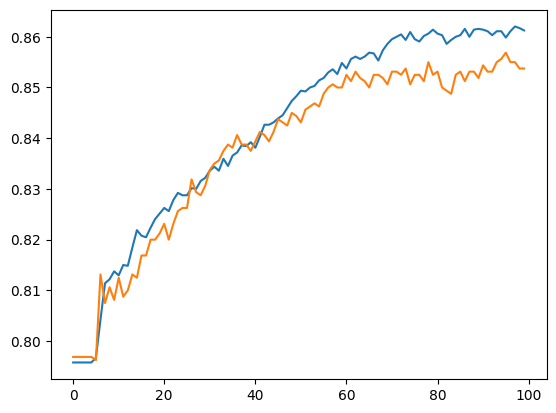

In [27]:
# Plotting training and validation accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

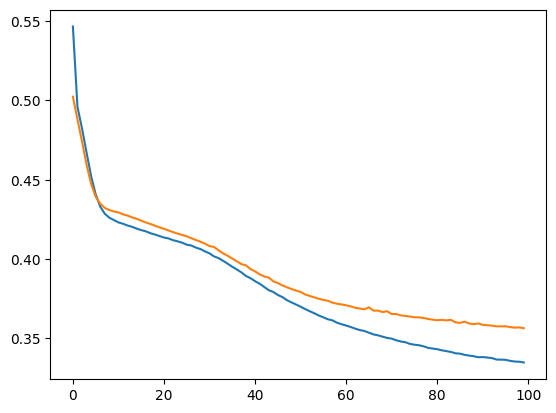

In [28]:
# Plotting training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])